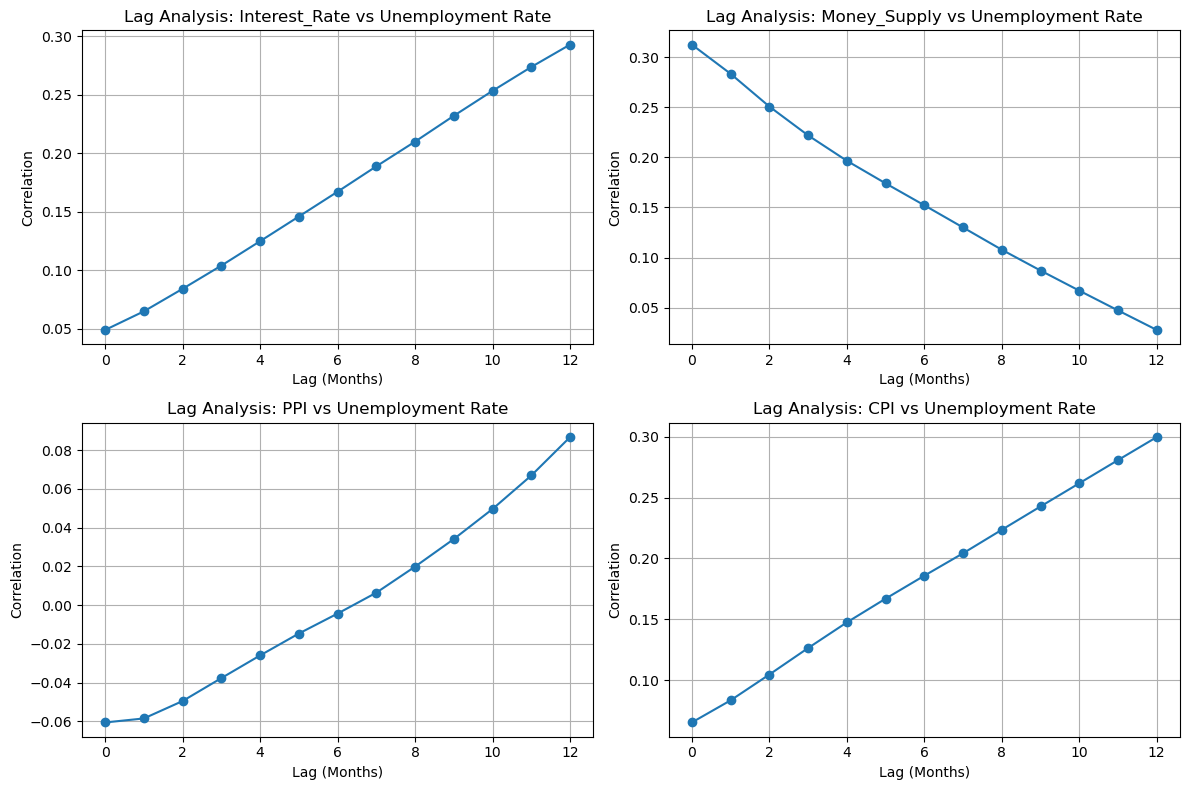

In [3]:
# Re-import and reload all files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the provided preprocessed files
unemployment_rate = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Unemployment_Rate_data_preprocessed.csv')
consumer_confidence = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Consumer_Confidence_data_preprocessed.csv')
cpi = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/CPI_data_preprocessed.csv')
gdp_growth = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/GDP_Growth_data_preprocessed.csv')
interest_rate = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Interest_Rate_data_preprocessed.csv')
money_supply = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Money_Supply_data_preprocessed.csv')
ppi = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/PPI_data_preprocessed.csv')

# Merge all dataframes on the 'Date' column
merged_data = unemployment_rate.merge(consumer_confidence, on='Date') \
    .merge(cpi, on='Date') \
    .merge(gdp_growth, on='Date') \
    .merge(interest_rate, on='Date') \
    .merge(money_supply, on='Date') \
    .merge(ppi, on='Date')

# Rename columns for consistency
merged_data.rename(columns={
    'UNRATE': 'Unemployment_Rate',
    'UMCSENT': 'Consumer_Confidence',
    'CPIAUCSL': 'CPI',
    'A191RL1Q225SBEA': 'GDP_Growth',
    'FEDFUNDS': 'Interest_Rate',
    'M2SL': 'Money_Supply',
    'PPIACO': 'PPI'
}, inplace=True)

# Perform lag analysis on specific predictors
def lag_analysis(data, predictor, target, max_lag=12):
    correlations = []
    for lag in range(0, max_lag + 1):
        shifted_predictor = data[predictor].shift(lag)
        correlation = data[target].corr(shifted_predictor)
        correlations.append(correlation)
    return correlations

# Variables requiring lag adjustment
variables_to_lag = ['Interest_Rate', 'Money_Supply', 'PPI', 'CPI']
target_variable = 'Unemployment_Rate'
lag_results = {}

# Perform lag analysis
max_lag = 12
for var in variables_to_lag:
    lag_results[var] = lag_analysis(merged_data, var, target_variable, max_lag)

# Plot lag correlation results
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axes = axes.flatten()

for i, var in enumerate(variables_to_lag):
    axes[i].plot(range(0, max_lag + 1), lag_results[var], marker='o')
    axes[i].set_title(f'Lag Analysis: {var} vs Unemployment Rate')
    axes[i].set_xlabel('Lag (Months)')
    axes[i].set_ylabel('Correlation')
    axes[i].grid()

plt.tight_layout()
output_dir = 'C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/EDA/scatter_plot'
png_save_path = os.path.join(output_dir,'lag_analysis.png')
# Save the plot as an image file
plt.savefig(png_save_path, format="png", dpi=300, bbox_inches="tight")
plt.show()
